<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

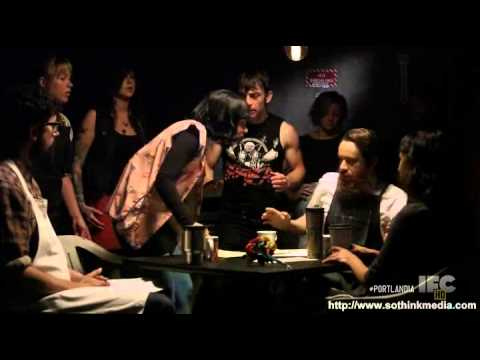

In [300]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [301]:
%pwd

'/Users/danoand/go/src/github.com/danoand/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [313]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [314]:
# Make a working copy of the original dataframe
df_shops = shops.copy()

In [304]:
# Export dataframe to a csv for possible inspection (e.g. via MS Excel)
df_shops.to_csv("df_shops.csv")

In [315]:
import re
import numpy as np
from datetime import datetime

# Declare regular expression patterns for use in data "wrangling"
rgx_NOT_alph_num        = re.compile(r'[^a-zA-Z0-9]')
rgx_NOT_alph_num_space  = re.compile(r'[^a-zA-Z 0-9]')
rgx_alph_float          = re.compile(r'[^\d\.]')
rgx_alph_int            = re.compile(r'\d+')
rgx_date                = re.compile(r'\d{1,2}\/\d{1,2}\/\d{4}')
rgx_check_in            = re.compile(r'\d+\s+check-ins?')

# std_comp_names updates non-standard company names
def std_comp_names(val):
    # trim/strip whitespace
    tmp = val.strip()

    # Update non-standard names
    if tmp == 'Caffe Medici':
        tmp = 'Caffé Medici'

    if tmp == 'Summermoon Coffee Bar':
        tmp = 'Summer Moon Coffee Bar'

    # Remove non alphanumeric characters
    tmp = re.sub(rgx_NOT_alph_num, '', tmp)
    
    # Lowercase string
    tmp = tmp.lower()

    return tmp

# num_ratings returns the first float number from a string rating
def num_ratings(val):
    tmp = re.sub(rgx_alph_float, '', val)

    return float(tmp)

# xtract_date extracts a date out of a review string
def xtract_date(val):
    lst_dte = re.findall(rgx_date, val)
    rt_dte  = np.NaN

    # Extract the date and construct a datatime object
    if len(lst_dte) > 0:
        rt_dte = datetime.strptime(lst_dte[0], "%m/%d/%Y")

    return rt_dte

# day_of_week returns the day of the week given a datetime object
def day_of_week(val):
    return val.weekday()

# month_of_year returns the day of the week given a datetime object
def month_of_year(val):
    return val.month

# xtract_chkin_num extracts the number of checkins referenced in a review
def xtract_chkin_num(val):
    # Extract the check-in value and generate an integer value
    rt_chk_ins = 0 
    lst_ckins  = re.findall(rgx_check_in, val)
    if len(lst_ckins) > 0:
        tmp_chkin       = lst_ckins[0]
        tmp_chkin_splt  = tmp_chkin.split()

        rt_chk_ins      = tmp_chkin_splt[0]

    return rt_chk_ins

# remove_date_chk_ins removes dates and checkin information from a review string
def remove_date_chk_ins(val):
    # Remove the date and check-in substrings
    rt_val = re.sub(rgx_date, "", re.sub(rgx_check_in, "", val))

    # Trim whitespace
    rt_val = rt_val.strip()

    # Return (review string, date, number of checks)
    return rt_val

# count_me counts the number of the specified characters in the passed value
def count_me(val, char):
    return val.count(char)

# filter_down_chars filters down to lowercase alphanumeric characters and spaces
def filter_down_chars(val):
    tmp = re.sub(rgx_NOT_alph_num_space, "", val).lower()

    return re.sub('\s+', ' ', tmp)

# det_is_good indicates if a value is "good"
def det_is_good(val):
    if val >= 4:
        return 1

    return 0

# Set up a wrangle method
# wrangle returns a dataframe with updated/created columns for a given input dataframe 
def wrangle(DF):
  X = DF.copy()

  # Update non-standard business names
  X["upd_coffee_shop_name"]                 = X["coffee_shop_name"].apply(std_comp_names)
  X["upd_star_rating"]                      = X["star_rating"].apply(num_ratings)
  X["upd_date"]                             = X["full_review_text"].apply(xtract_date)
  X["upd_date_day"]                         = X["upd_date"].apply(day_of_week)
  X["upd_date_month"]                       = X["upd_date"].apply(month_of_year)
  X["upd_ckins"]                            = X["full_review_text"].apply(xtract_chkin_num)
  X["upd_full_review_text"]                 = X["full_review_text"].apply(remove_date_chk_ins)
  X["upd_exclamations"]                     = X["full_review_text"].apply(count_me, args=("!"))
  X["upd_question_marks"]                   = X["full_review_text"].apply(count_me, args=("?"))
  X["upd_full_review_text_lc_alpnum_spc"]   = X["upd_full_review_text"].apply(filter_down_chars)
  X["upd_has_good_rating"]                  = X["upd_star_rating"].apply(det_is_good)
 
  return X

In [316]:
# Execute the dataframe wrangling
df_shops_upd = wrangle(df_shops)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [319]:
import spacy
nlp = spacy.load("en_core_web_lg")

# Spacy's Default Stop Words
nlp.Defaults.stop_words
STOP_WORDS = nlp.Defaults.stop_words

# proc_word_count takes a dataframe column and generates a data frame of unique words and their counts
def proc_word_count(DF, col_name):
    # Creat a working map
    wrk_map_ctr = {}

    # func_count_string_words iterates through word tokens in a passed string
    def func_count_string_words(val):
        # split the passed string delimited by space
        lst_words = val.split()

        # Iterate through the list increment the counter map
        for wrd in lst_words:
            # Ignore words that are two letters or less in length (a crude type of stop word)
            if len(wrd) <= 2:
                continue
                
            # Ignore word if it resides in the Spacy set of stop words
            if wrd in STOP_WORDS:
                continue
                
            ctr = wrk_map_ctr.get(wrd, 0) + 1
            wrk_map_ctr[wrd] = ctr

    # Count the words in the specified column of the passed dataframe
    DF[col_name].apply(func_count_string_words)

    # Transform the working map to a dataframe
    wrk_df = pd.DataFrame(wrk_map_ctr.items(), columns=['word', 'word_count'])
    
    return wrk_df

In [320]:
# Generate a dataframe describing a high level word count
df_wrd_cnt = proc_word_count(df_shops_upd, "upd_full_review_text_lc_alpnum_spc")

# Sort the word count 
df_wrd_cnt.sort_values("word_count", ascending=False, inplace=True)

In [322]:
# Most used words
df_wrd_cnt.head(25)

,word,word_count
4,coffee,10353
70,place,5426
142,good,3973
129,great,3919
166,like,3088
43,austin,2252
0,love,1935
487,time,1884
364,food,1836
58,nice,1741


In [323]:
# proc_word_rel_diff returns a dataframe listing words and their relative count 
#   ... for "good" (+1) and "bad" (-1) reviews
def proc_word_rel_diff(DF):
    # Creat a working map
    wrk_map_rel_diff = {}

    # Iterate through the passed dataframe
    for index, row in DF.iterrows():
        val     = row["upd_full_review_text_lc_alpnum_spc"]
        is_good = row["upd_has_good_rating"]


        # split the passed string delimited by space
        lst_words = val.split()

        # Iterate through the list of words
        for wrd in lst_words:
            # Ignore words that are two letters or less in length (a crude type of stop word)
            if len(wrd) <= 2:
                continue
                
            # Ignore word if it resides in the Spacy set of stop words
            if wrd in STOP_WORDS:
                continue
                
            ctr = wrk_map_rel_diff.get(wrd, 0)

            if is_good == 1:
                wrk_map_rel_diff[wrd] = ctr + 1

            if is_good != 1:
                wrk_map_rel_diff[wrd] = ctr - 1

    wrk_df_rel = pd.DataFrame(wrk_map_rel_diff.items(), columns=['word', 'wordcountrel'])

    return wrk_df_rel

In [324]:
# Generate the word count relative to good and bad ratings.  
#  * A word used in a good review is scored +1
#  * The same word used in a bad review is scored -1
df_wrd_cnt_rel = proc_word_rel_diff(df_shops_upd)
df_wrd_cnt_rel.reset_index(drop=True)

# Sort used words by their "relative" count
df_wrd_cnt_rel.sort_values("wordcountrel", ascending=False, inplace=True)
df_wrd_cnt_rel.to_csv("df_wrd_cnt_rel.csv")

In [325]:
# Print out the words use more for bad ratings than good ratings (have a low relative score)
df_wrd_cnt_rel.tail(25)

,word,wordcountrel
706,okay,-11
145,150,-12
3237,subpar,-13
3121,paying,-14
2090,supposed,-16
4835,response,-17
4165,worse,-17
398,lackluster,-17
3145,terrible,-17
3204,jerk,-18


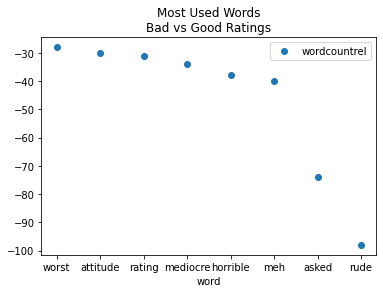

In [326]:
# Plot the words with the lowest 'relative' score
df_wrd_cnt_rel.tail(8).plot(x='word', y='wordcountrel', style='o', title='Most Used Words\nBad vs Good Ratings');

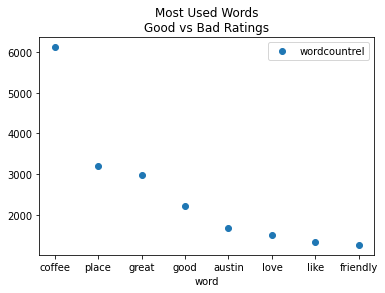

In [327]:
# Plot the words with the highest 'relative' score
df_wrd_cnt_rel.head(8).plot(x='word', y='wordcountrel', style='o', title='Most Used Words\nGood vs Bad Ratings');

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

